Import all the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
data.shape

(244, 7)

Relationship between "tip" and "total_bill"

Inference: With increase of the total_bill, the tip is also increasing in this visualization

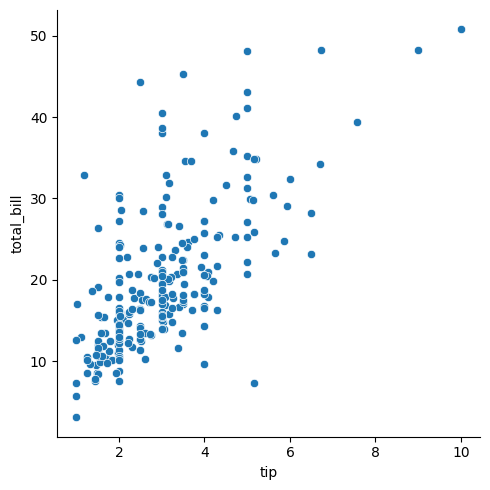

In [4]:
sns.relplot(x='tip', y='total_bill', data=data)

On the basis of categorical values, you can make a plot via the parameter named as "hue" in the seaborn visualization plots

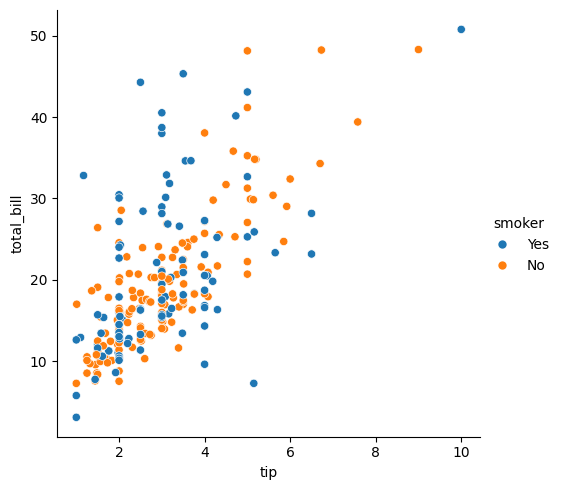

In [5]:
sns.relplot(x='tip', y='total_bill', data=data, hue='smoker')

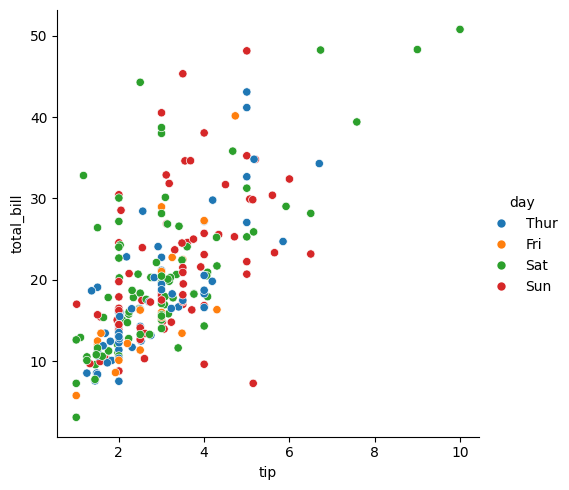

In [6]:
sns.relplot(x='tip', y='total_bill', data=data, hue='day')

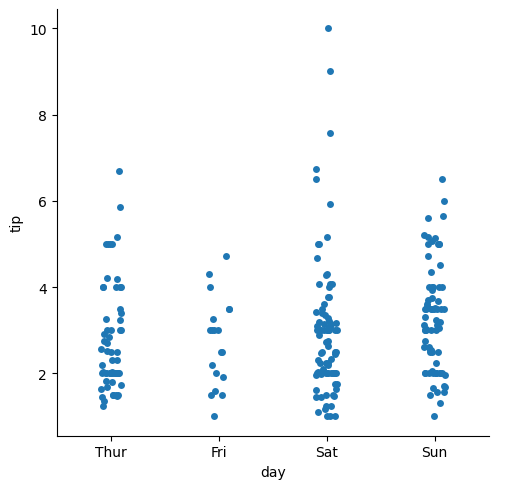

In [7]:
sns.catplot(x = 'day', y='tip', data = data)

<Figure size 800x600 with 0 Axes>

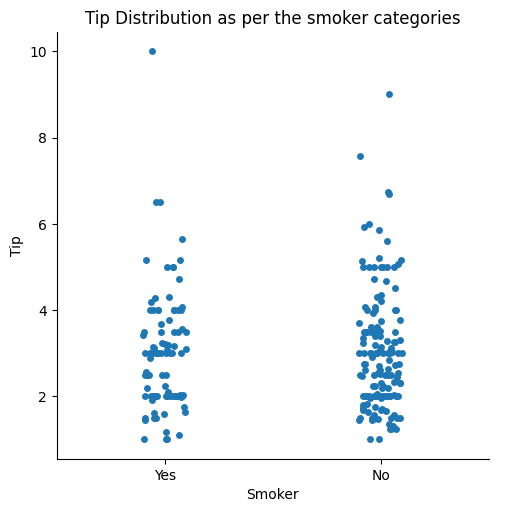

In [26]:
plt.figure(figsize=(8,6))
sns.catplot(x = 'smoker', y='tip', data = data)
plt.title('Tip Distribution as per the smoker categories')
plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.savefig('distribution-plot.png')
plt.show()

Apply the encoding techniques in the four columns named [sex, smoker, day, time]

In [11]:
data['time'].value_counts()

,count
time,
Dinner,176
Lunch,68


In [13]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Encoding Technique: Label Encoding [sex, smoker, time] (binary discrete variables)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
tips_encoded = data.copy()

label_encoder = LabelEncoder()
tips_encoded['sex'] = label_encoder.fit_transform(data['sex'])

In [15]:
tips_encoded.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [17]:
tips_encoded['smoker'] = label_encoder.fit_transform(data['smoker'])
tips_encoded['time'] = label_encoder.fit_transform(data['time'])
tips_encoded.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4
5,25.29,4.71,1,0,Sun,0,4
6,8.77,2.00,1,0,Sun,0,2
7,26.88,3.12,1,0,Sun,0,4
8,15.04,1.96,1,0,Sun,0,2
9,14.78,3.23,1,0,Sun,0,2


Encoding Technique: One hot encoding for the column named "day"

In [19]:
tips_encoded = pd.get_dummies(data, columns=['day'], drop_first=True)
tips_encoded.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,False,False,True
1,10.34,1.66,Male,No,Dinner,3,False,False,True
2,21.01,3.50,Male,No,Dinner,3,False,False,True
3,23.68,3.31,Male,No,Dinner,2,False,False,True
4,24.59,3.61,Female,No,Dinner,4,False,False,True


In [21]:
tips_encoded.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,False,False,True
1,10.34,1.66,Male,No,Dinner,3,False,False,True
2,21.01,3.50,Male,No,Dinner,3,False,False,True
3,23.68,3.31,Male,No,Dinner,2,False,False,True
4,24.59,3.61,Female,No,Dinner,4,False,False,True


In [22]:
tips_encoded['sex'] = label_encoder.fit_transform(data['sex'])
tips_encoded['smoker'] = label_encoder.fit_transform(data['smoker'])
tips_encoded['time'] = label_encoder.fit_transform(data['time'])
tips_encoded.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,0,2,False,False,True
1,10.34,1.66,1,0,0,3,False,False,True
2,21.01,3.50,1,0,0,3,False,False,True
3,23.68,3.31,1,0,0,2,False,False,True
4,24.59,3.61,0,0,0,4,False,False,True


In [23]:
tips_encoded.corr()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
total_bill,1.000000,0.675734,0.144877,0.085721,-0.183118,0.598315,-0.086168,0.054919,0.122953
tip,0.675734,1.000000,0.088862,0.005929,-0.121629,0.489299,-0.055463,-0.002790,0.125114
sex,0.144877,0.088862,1.000000,0.002816,-0.205231,0.086195,-0.071060,0.053957,0.168106
smoker,0.085721,0.005929,0.002816,1.000000,-0.054921,-0.133178,0.244316,0.155744,-0.181624
time,-0.183118,-0.121629,-0.205231,-0.054921,1.000000,-0.103411,0.058159,-0.462709,-0.418071
size,0.598315,0.489299,0.086195,-0.133178,-0.103411,1.000000,-0.142184,-0.041121,0.193054
day_Fri,-0.086168,-0.055463,-0.071060,0.244316,0.058159,-0.142184,1.000000,-0.216319,-0.195451
day_Sat,0.054919,-0.002790,0.053957,0.155744,-0.462709,-0.041121,-0.216319,1.000000,-0.500682
day_Sun,0.122953,0.125114,0.168106,-0.181624,-0.418071,0.193054,-0.195451,-0.500682,1.000000


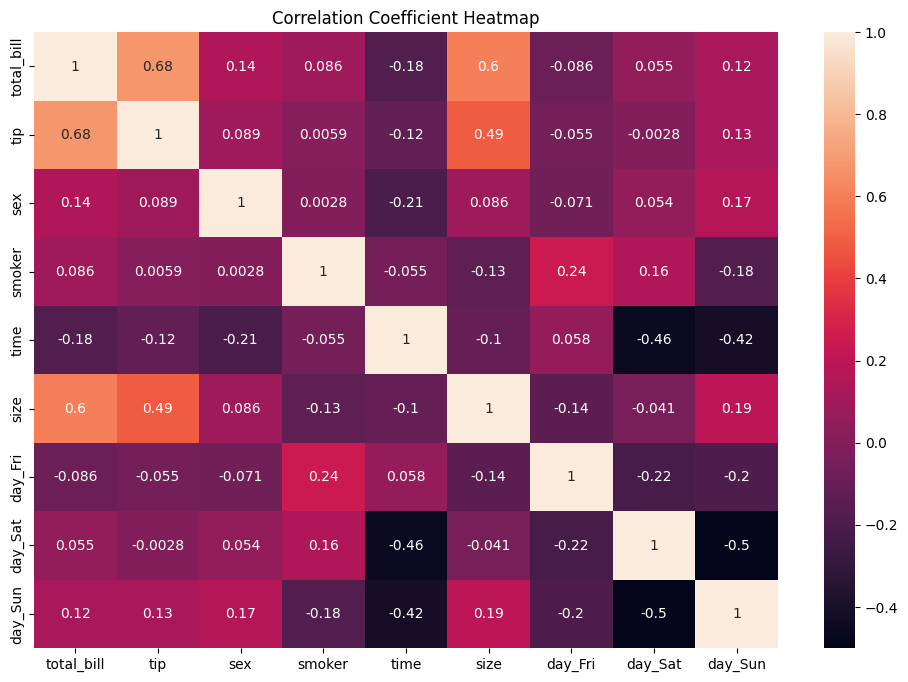

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(tips_encoded.corr(), annot=True)
plt.title('Correlation Coefficient Heatmap')
plt.savefig('correlation-coefficient.png')
plt.show()

For the Outliers detection: Box Plot/ Violin Plot

Task: Explore on your own about the violin plot

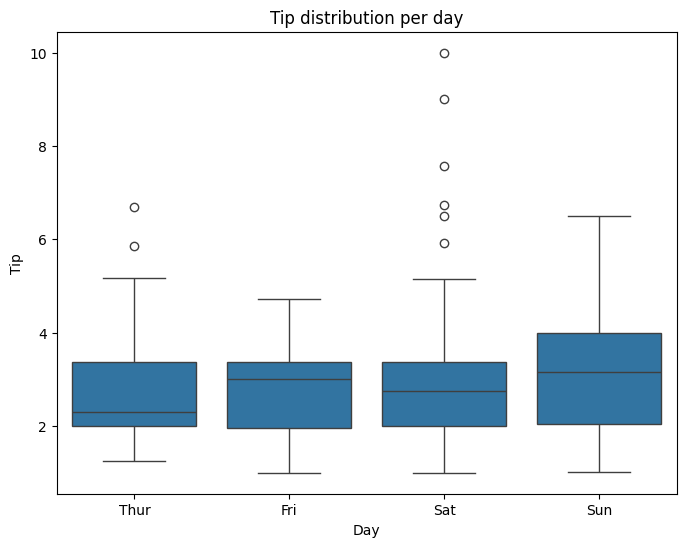

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='tip', data=data)
plt.title("Tip distribution per day")
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

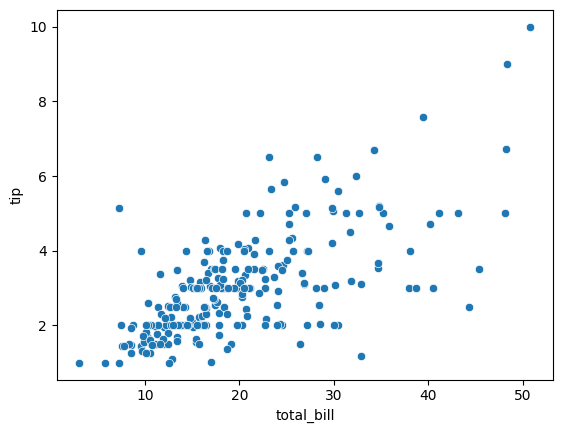

In [29]:
sns.scatterplot(x='total_bill', y='tip', data=data)

Average tip per day

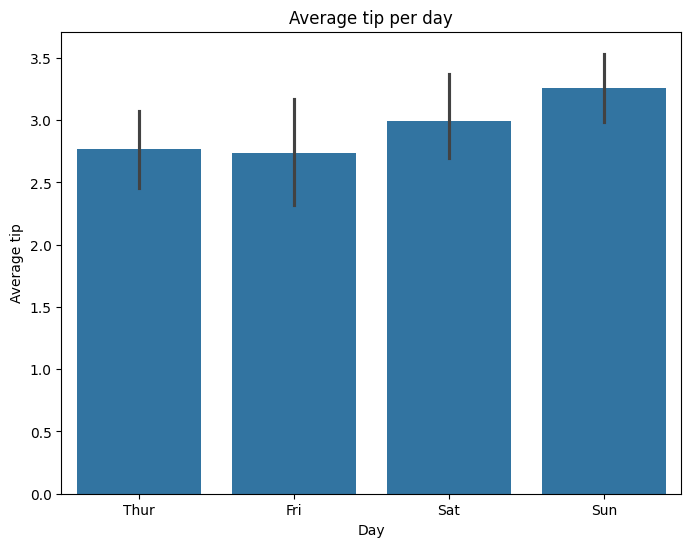

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x='day', y='tip', data=data, estimator= lambda x:sum(x)/len(x))
plt.title('Average tip per day')
plt.xlabel('Day')
plt.ylabel('Average tip')
plt.show()

Relationship among all the variables

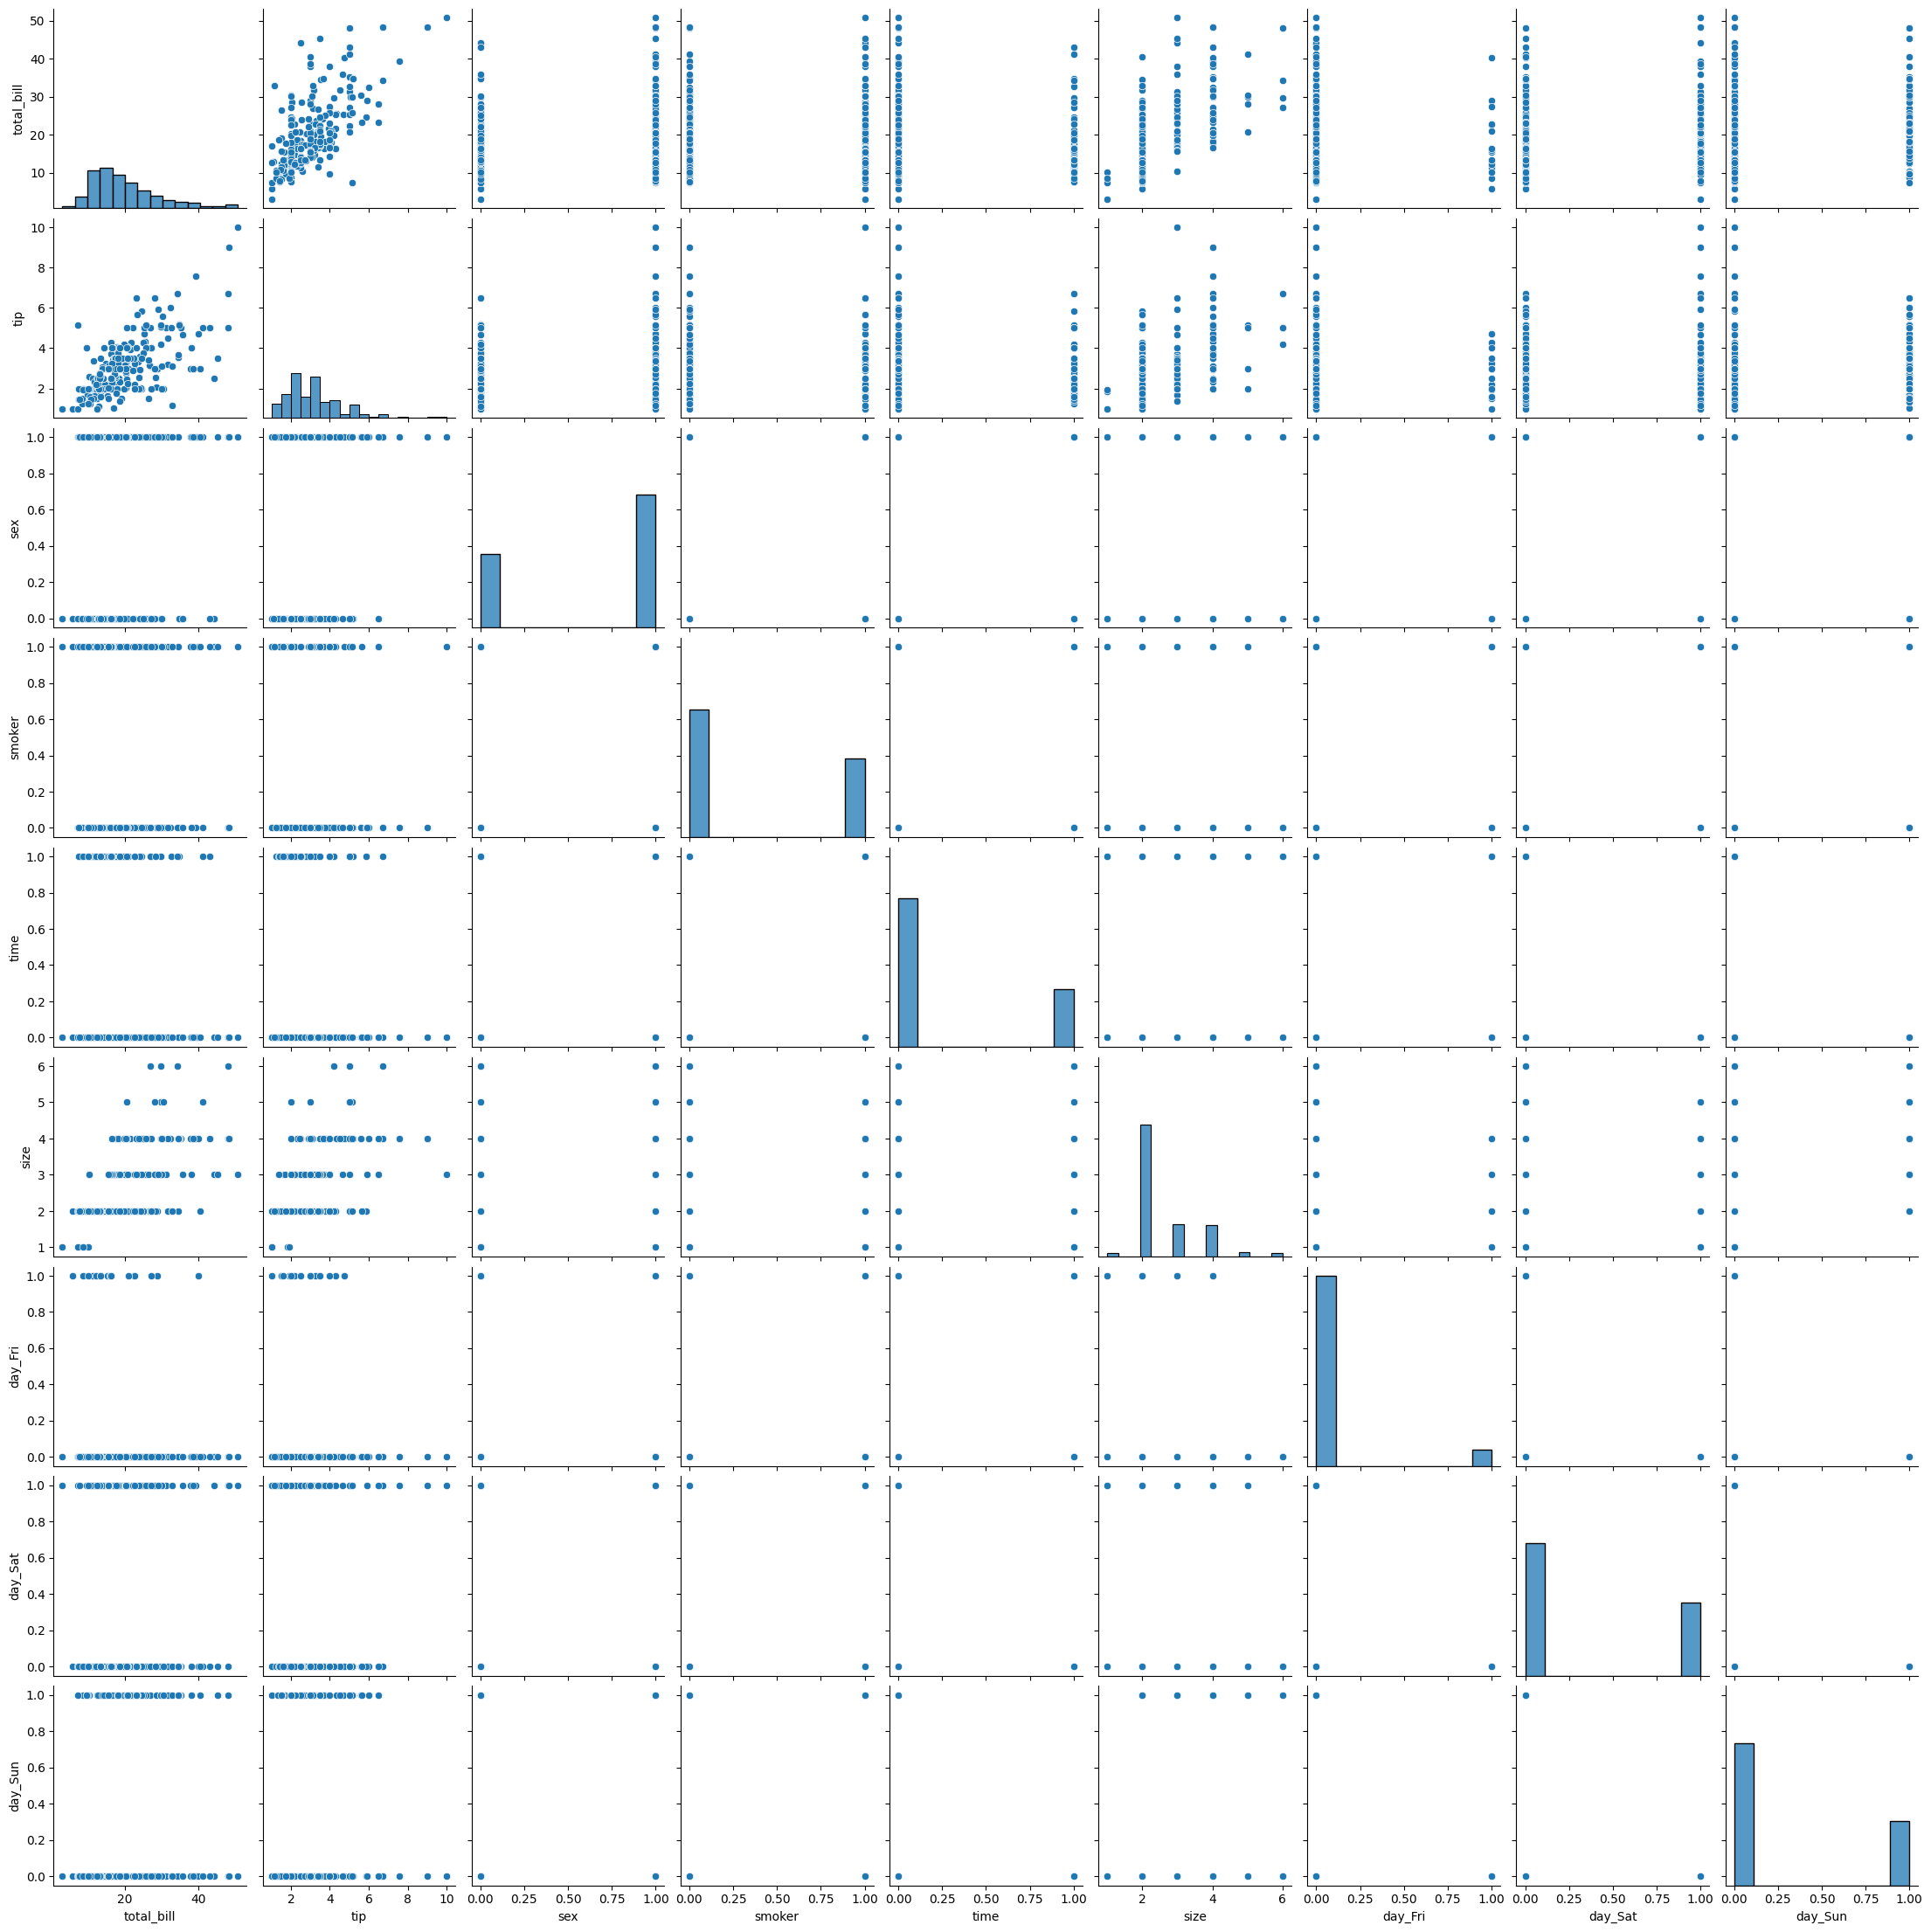

In [32]:
sns.pairplot(tips_encoded)

Task:

*   Violin Plot
*   Histogram
*   Line Plot
*   Pie Chart

<ipython-input-33-25858ea7ab66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tip'])


<Axes: xlabel='tip', ylabel='Density'>

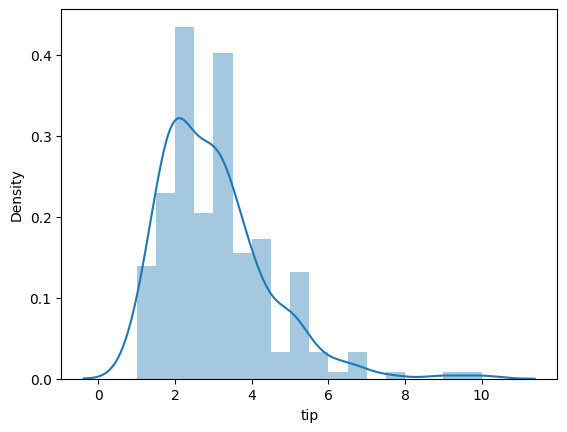

In [33]:
sns.distplot(data['tip'])